# Final Report

# Getting Ahead of the Headline 
Analyzing employee emails using Natural Language Processing, Sentiment Analysis, and Time Series Analysis<br>

![](00_Stephanie/images/0_header.png)
Enron Topic Modeling | Codeup, Hopper Cohort | March 2022<br><br>
>Paige Guajardo<br>
Rajaram Gautam<br>
Stephanie Jones<br>
Kaniela Denis<br><br>

# Executive Summary
## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.<br><br>

Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

## Background
Enron Corporation was a major American energy, commodities, and services company that declared bankruptcy in December 2001 after over a decade of fraudulent accounting practices. During an error of more lenient financial regulations and high market speculation, Enron hid its financial losses in special purposes entities, making it appear much more profitable on paper than it actually was.
<br><br>
Enron has become synonymous with willful corporate fraud and corruption. The scandal also brought into question the accounting practices and activities of many corporations in the United States and was a factor in the enactment of the Sarbanes-Oxley Act of 2002. The scandal also affected the greater business world by causing the dissolution of the Arthur Andersen accounting firm, which had been Enron's main auditor for years.

## Business Goal
Company leaders, lawmakers, and the public will be able to use our analysis to identify key themes in communication between persons of interest in the early stages of investigating suspicious organizational activity. 

## Initial Hypothesis
Our initial hypothesis is that there will be distinct trends in email topics and sentiment over time. 

## Data Dictionary
variable | dtype | description
:-- | :-- | :--
`date` | datetime | date email was sent
`file` | object | email file path (storage)
`sender` | object | email sender email address
`subject` | object | text of email subject
`content` | object | raw email content
`lemmatize` | object | cleaned and lemmatized email content
`intensity` | float | vader sentiment intensity analyzer score
`polarity` | float | measure of email sentiment, -1 (neg) to 1 (pos)
`subjectivity` | float | measure of email subjectivity, 0 (obj), 1 (sub)
`poi` | bool | is person directly connected to investigation
`is_internal` | bool | True == email was sent from Enron address


## Person of Interest
Using the text from the Congressional investigation report, we identified key people of interest at Enron, linked to the investigation. (see citation below for report). 
Name | Connection to Enron | Enron Investigation
:-- | :-- | :---
Name | Role at Enron | Investigated/indicted/fired



# Planning
We used a [Trello Board](https://trello.com/b/osnQZqjJ/enronnlp-project) for planning.

# Acquire

We acquired our data from: [Kaggle](https://www.kaggle.com/wcukierski/enron-email-dataset), Will Cukierski | 2016
>To acquire the raw data used for this project, download the csv file from the link above to your local drive and used the `pandas` library to read to a DataFrame. For instructions on downloading `pandas` see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4. 

##### We downloaded the csv file and read it into the notebook as part of the wrangle steps below.

# Wrangle

### Clean
Steps for Data Cleaning
>- Import `email.parser` library for text parsing (see [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4) and parsed email contents to extract date, sender, subject, and body.
>- apply .lower(), .strip(), regex, normalize(), and encode() function to email body contents 
>- tokenize email body contents
>- remove stop words
>- stem and lemmatize
>- changed date column dtype to datetime
>- dropped nulls

### Engineered Features
The following sentiment score algorithms were applied to lemmatized email words to create score columsn intensity, polarity, and subjectivity. (See [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md), Steps to Recreate, Step 4)
>- Vader Sentiment Intensity Analyzer 
>- Textblob Polarity and Subjectivity
>- `is_internal` (`True` if email has @enron in address)
>- `poi` (See [README.md](https://github.com/Enron-Discussion-NLP/Capstone/blob/014d19cd2bfe023333f67e7bf5c30a1f13858e11/README.md) for additional information on Persons of Interest)

In [1]:
import pandas as pd
import numpy as np

import wrangle
import model
import viz

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns

### Running the wrangle function ('create_data_frames_wrangle') took ~50 minutes so instead we will read the dataframe into the notebook.
- Used Pandas to read the csv file to create the dataframes df and time_series. 
- Two seperate dataframes were needed to do Time Series and Topic Modeling analysis. 

In [2]:
# For reference, below is the code we used to run the function to wrangle data and retun df and time_series# df, time_series_df = wrangle.create_dataframes_wrangle()

In [3]:
# read in the wrangle csv to return df
df = pd.read_csv('01_wrangle_df.csv')

In [4]:
# reades the time_series csv to return time_series_df
time_series_df = pd.read_csv('02_time_series_df.csv')

### Because we have read in the dataframes, the following function will:
- Remove nulls
- Set the date column as datetime data type with UTC
- Set date column as the index and sort by ascending order

In [5]:
# run read_in function to clean dataframes and make date column into datetime
df, time_series_df = wrangle.read_in(df, time_series_df)

# Explore

## Univariate Exploration

### What are the distributions of each of the continuous and boolean variables?

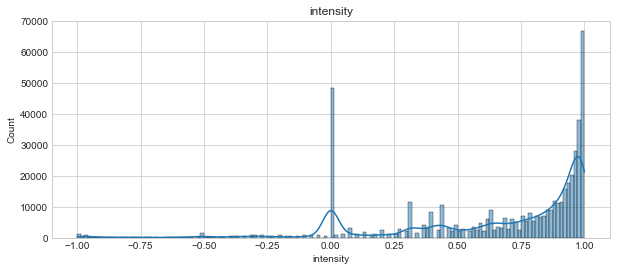

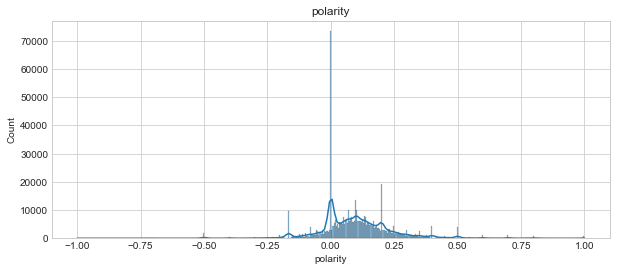

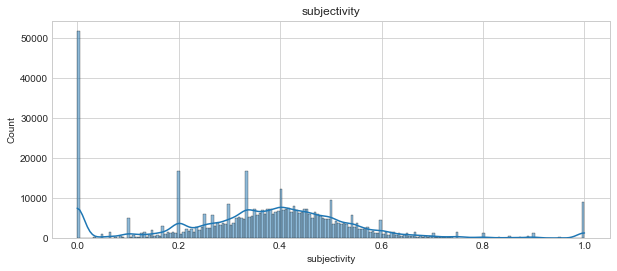

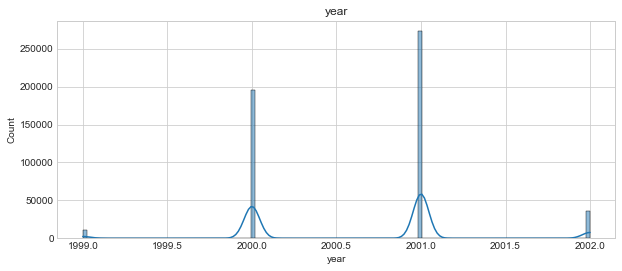

In [6]:
# Plot distribution of intensity, polarity, subjectivity, and year
viz.viz_1(time_series_df)

### Takeaways
- Intensity is mostly neutral or positive, polarity is mostly neutral, and subjectivity is mostly objective
- Most emails in 2000 and 2001

### What is the count of internal vs external emails?

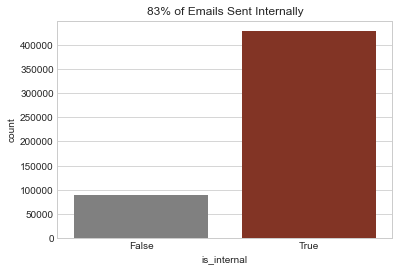

In [7]:
# plot internal vs not internal emails
viz.viz_2(df)

### Takeaways
- There are significantly more internal emails than external emails

### What is the count of email from persons of interest vs non-persons of interest?

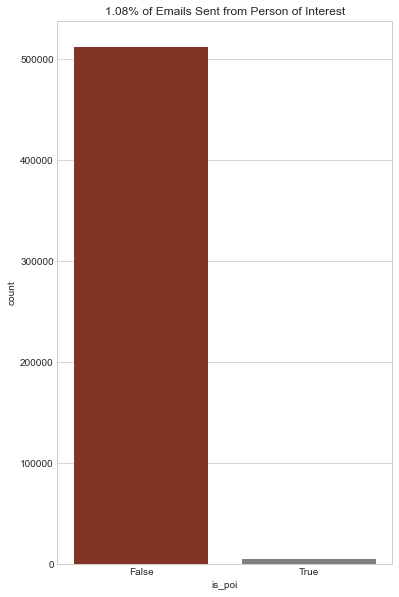

In [8]:
# emails sent from a non-person of of interest vs persons of interest
viz.viz_3(df)

### Takeaways
- Significantly more emails were sent from non-persons of interest

#### Takeaways from Univariate Exploration
- Intensity is mostly neutral or positive, polarity is mostly neutral, and subjectivity is mostly objective
- Most emails in 2000 and 2001
- There are significantly more internal emails than external emails
- Significantly more emails were sent from non-persons of interest

This is a very large corpus of employee emails. For the mvp we will focus only on the persons of interest from the years 1999 - 2002 for further exploratory analysis.

## Bivariate Exploration

### What are the distributions of each measure of sentiment by year?

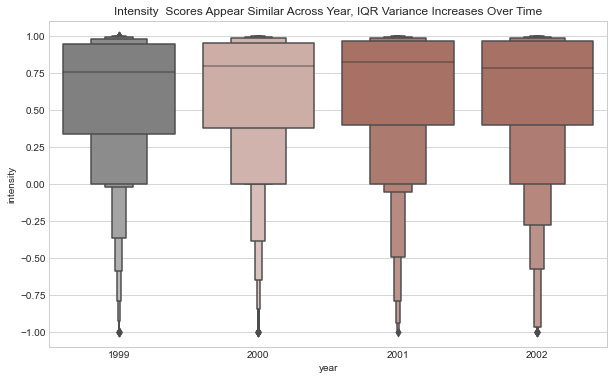

In [9]:
# plotting intensity score by year to look at median, IQR, and outliers
viz.viz_4(time_series_df)

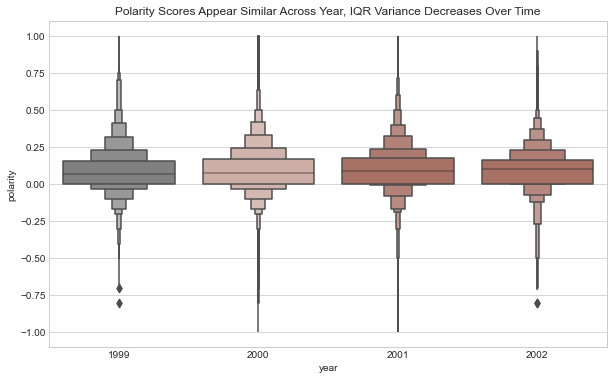

In [10]:
# plotting polarity score by year to look at median, IQR, and outliers
viz.viz_5(time_series_df)

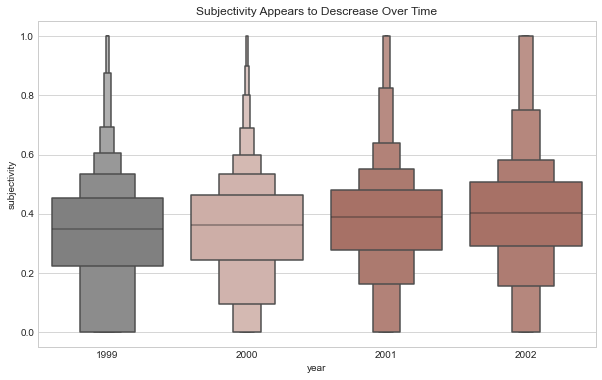

In [11]:
# # plotting subjectivity score by year to look at median, IQR, and outliers
viz.viz_6(time_series_df)

### Takeaways
- The distribution intensity, polarity, and subjectivity scores are mostly the same over the years

### What are the distributions of each measure of sentiment by internal vs external emails?

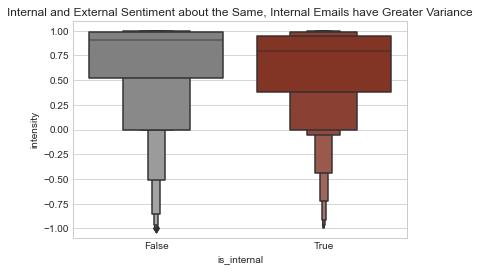

In [12]:
# Creates boxplot of intensity of internal/external emails
viz.viz_7(df)

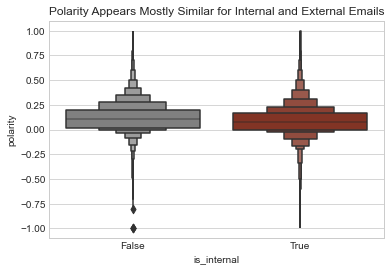

In [13]:
# Create boxplot of polarity of internal/external emails
viz.viz_8(df)

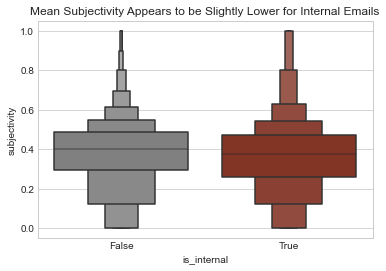

In [14]:
# Creates boxplot of subjectivity for internal/external email
viz.viz_9(df)

### Takeaways
- The distribution ofintensity, polarity, and subjectivity are mostly the same for internal vs external emails

### What are the distributions of each measure of sentiment by POI vs Non-POI?

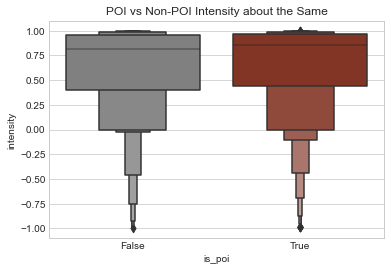

In [15]:
# Creates boxplot of intensity of internal/external emails
viz.viz_10(df)

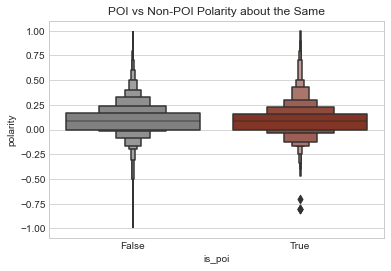

In [16]:
# Create boxplot of polarity of internal/external emails
viz.viz_11(df)

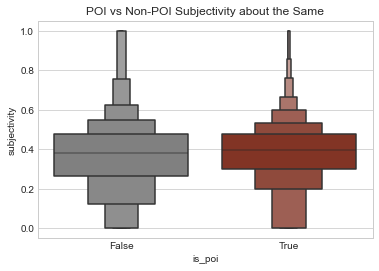

In [17]:
# Creates boxplot of subjectivity for internal/external email
viz.viz_12(df)

### Takeaways
- The distribution ofintensity, polarity, and subjectivity are mostly the same for POI vs Non-POI emails

## Takeaways from Bivariate Analysis
- The distribution ofintensity, polarity, and subjectivity are mostly the same through 1999-2002
- The distribution ofintensity, polarity, and subjectivity are mostly the same for internal vs external emails
- The distribution ofintensity, polarity, and subjectivity are mostly the same for POI vs Non-POI emails

## Multivariate Analysis

### Is there any correlation between variables?

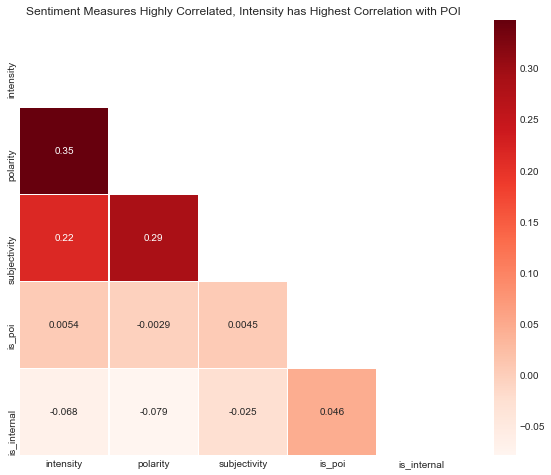

In [18]:
viz.viz_13(df)

### Takeaways from Multivariate Analysis
Measures of Sentiment Appear to be Correlated
- Highest correlation with polarity and intensity which makes sense since they are similar measures for sentiment
- Very small correlation of between is_internal and is_poi

## Time Series Analysis
### How does the aggregate sum of `intensity` change over time?

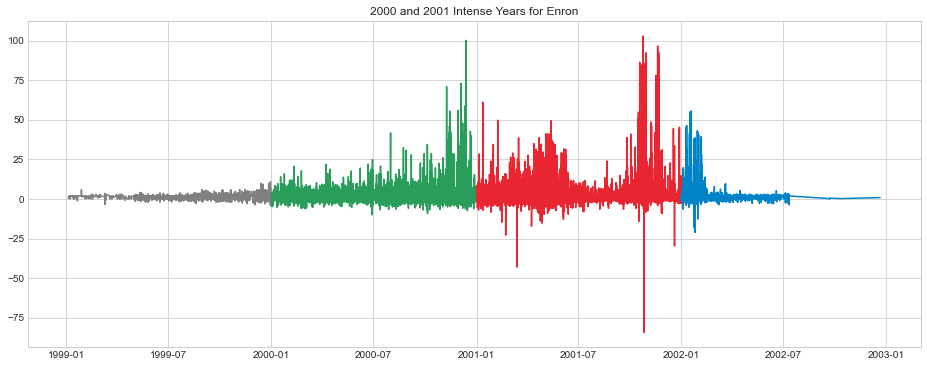

In [19]:
# Plots sentiment overtime and color codes each year
viz.viz_14(time_series_df)

### Takeaways
- Aggregate sum of intensity has significan dips at the end of 2001 which aligns with the scandal announcements.

### Is there any seasonality in the monthly `intensity` score? 

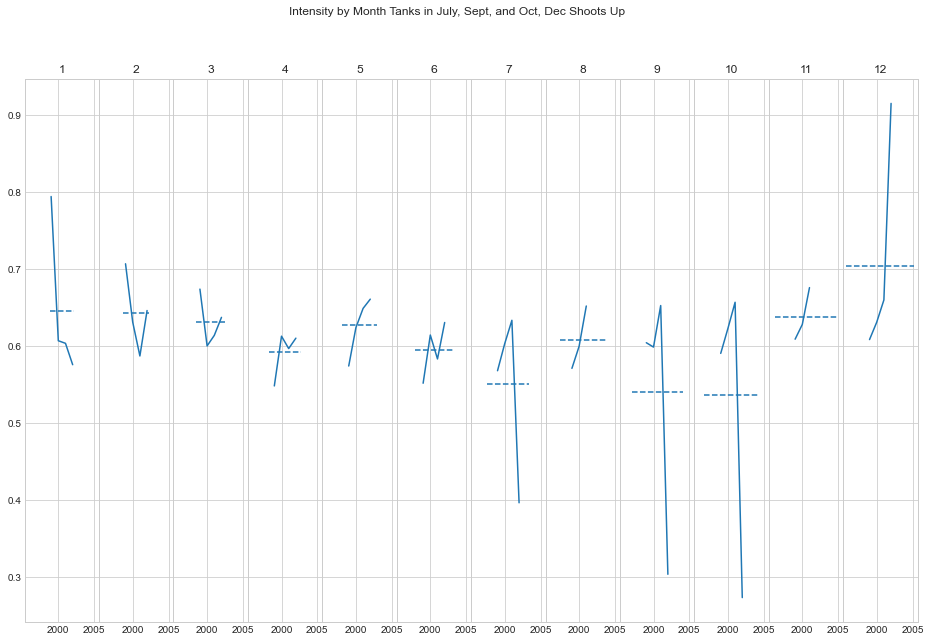

In [20]:
# Creates a seasonal plot by month
viz.viz_15(time_series_df)

### Takeaway
- There are significant dips in intensity in three of the twelve months

### Takeaways from Time Series Analysis

- In 2000 Intensity scores have higher than normal positive spikes and in 2001 higher than normal positive and negative spikes. Based on what was going on (2000) being the year before Enron was caught and (2001) being the year they were caught this makes sense.

- Anyone investigating alleged mismanagement or suspicious activity could look for these abnormal spikes as indicators of: 
    1. When persons of interest may have been engaging in deceptive behavior that had positive impacts on the general population
    2. When the general population began to become aware of the deceptive practices.

# Topic Modeling

We used the `BERTopic` topic modeling algorithms to test our hypothesis, that we could identify unique themes in the email corpus by year. The functions used for this model can be found in the `model.py` module.
<hr>

### *Note: Reproducability may differ slightly due to the stochastic nature of UMAP
- UMAP uses randomness to increase approximation speed. Reference: https://umap-learn.readthedocs.io/en/latest/reproducibility.html
- To help with reproducability, the umap model hyper-parameters have been defined

### Subgroup to Persons of Interest for 2001 and 2002
- Because there are no significant differences of sentiment measures (intensity, polarity, and subjectivity) between POI vs Non_POI subgroups, topic modeling will use only those subgroups.

In [35]:
# createn dataframes for poi==true for 2000 and 2001
df_2000, df_2001 = wrangle.create_topic_dataframes(df)

## BERTopic

## What are the topic for POI emails in 2000?

In [43]:
# This functions runs BERTopic on lemm data to get topics and it also produced sentiment values per toptic
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2000)
topics_scores.head(20)

,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,61,0_embedded_mm_financing_commodity,['david go forward basis please ensure technic...,0.9552,4.259259e-02,0.283333
1,1,59,1_ge_newalb_2001_reference,"[""good job rodney keep speed let know help reg...",0.9923,1.357143e-01,0.400777
2,2,45,2_iso_bid_calpine_sc,['effective immediately need make every effort...,0.9880,1.114555e-01,0.480693
3,3,44,3_communicationsenron_communication_asia_massa...,['whalley significance death card tarot card k...,0.9938,7.171090e-03,0.308790
4,4,44,4_rick_md_vp_198mm,"['news rick', ""bad problem good response other...",-0.5106,5.551115e-17,0.633333
5,5,43,5_survey_pulse_employee_20,['beth ellen would like reemphasize concern co...,0.9965,5.395833e-02,0.386987
6,6,42,6_adam_wind_deal_merrill,"[""give harry ' regard delainey forwarded david...",0.9983,1.099239e-01,0.433434
7,7,40,7_reviewer_pep_httppepcorpenroncom_approval,['forwarded david w delaineyhouect 11122000 03...,0.9666,3.863636e-02,0.407955
8,8,37,8_leadership_cornell_case_school,['dick right thing run timing issue future hes...,0.9910,8.380242e-02,0.453404
9,9,37,9_delainey_ecogaskafus_kern_quiet,['pretty quiet ecogaskafus front whats regard ...,0.7003,2.875000e-01,0.533333


### Takeaways
- Produced too many topics to analyze. Need to reduce topic count.

### What does the topics hierarchy look like?

In [45]:
model.topic_tree(topic_model)

### Takeways
- The clustering can be broken down into 18 major groups defined by colors

### What are the topics when topic numer is reduced to 18?

In [46]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=18)
topics_scores.head(20)

,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,178,0_deal_ge_rodney_would,"['test3', 'test2', 'test', 'dorie question eff...",0.9999,0.103989,0.394936
1,1,175,1_barge_delainey_regard_guy,"['ok', 'yes', 'fine', 'see attached', 'see att...",0.9974,0.123741,0.451574
2,2,155,2_iso_jmf_bid_ttc,['effective immediately need make every effort...,0.9994,0.104605,0.436733
3,3,139,3_rick_tx_great_let,"['fine need hard copy signature rick', 'look g...",0.9886,0.337500,0.475595
4,4,128,4_cap_price_ferc_market,"[""forwarded david w delaineyhouect 06292000 12...",0.9996,0.047945,0.429080
5,5,107,5_group_would_john_east,['dick right thing run timing issue future hes...,0.9997,0.053502,0.418760
6,6,104,6_pm_dave_kay_david,"[""wayne would fine regard delainey forwarded d...",0.9999,0.132183,0.358370
7,7,103,7_communicationsenron_communication_john_david,['whalley significance death card tarot card k...,0.9994,0.056645,0.444819
8,8,102,8_super_saturday_david_john,"['yes thxs dave', 'sound good mark thsx dave',...",0.9990,0.110535,0.429717
9,9,96,9_david_presentation_pm_esca,['rebecca attached find presentation hpl deal ...,0.9978,0.128661,0.374240


### Takeaways
- Topics are very different

### What does the topics hierarchy look like?

In [47]:
model.topic_tree(topic_model)

### Takeaways
- Can be clustered into one hierarchical group

### What are the topics related to the word "attack" in 2001?
- This method creates an embedding for search_term and compares that with the topic embeddings. The most similar topics are returned along with their similarity values.

In [48]:
topics, similarity = topic_model.find_topics('attack')
topics_df[topics_df.topic.isin(topics)]

,topic,count,name
1,0,178,0_deal_ge_rodney_would
3,2,155,2_iso_jmf_bid_ttc
5,4,128,4_cap_price_ferc_market
6,5,107,5_group_would_john_east
16,15,84,15_tva_ena_offsite_ike


### Takeaways
- The top topic found in the search of "attack" is also the top topic of the model

### What are the topics for POI emails in 2001?

In [49]:
topics, probs, topic_model, topics_df, docs_df, topics_scores, emails_lemm = model.create_topic_scores(df=df_2001)
topics_scores.head(20)

,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,104,0_rick_original_2001_message,['like tx rick original message valdez veronic...,0.9607,0.110044,0.630526
1,1,81,1_meeting_jeff_know_let,"[""jeff go ahead meeting think know let know gu...",0.9735,0.050000,0.226667
2,2,55,2_anne_communicationsenron_ann_communication,"[""christiethis may go ' sure misha siegel copy...",0.9915,0.148160,0.453656
3,3,52,3_cdwr_ppa_priority_supplier,['gentleman spoken cdwr several time since sub...,0.9938,0.181863,0.386765
4,4,41,4_sun_chris_nda_hill,['everyone carla hoffman informed friday accep...,0.9931,0.267273,0.260909
5,5,39,5_david_mark_steven_john,"[""since charge career development want preside...",0.9966,0.161344,0.489859
6,6,36,6_rick_news_10am_discus,"[""' meeting w bradford 11 discus want join u r...",0.3612,0.000000,0.000000
7,7,36,7_board_director_october_kelly,"[""management committee invited join enron corp...",0.8779,0.141414,0.523232
8,8,33,8_risk_var_credit_model,"[""richard understanding investment currently r...",0.9982,0.135183,0.453827
9,9,32,9_thxs_delainey_regard_thsx,"['thxs note best regard delainey', 'ok call sp...",0.9423,0.566667,0.398148


### Takeaways
- Repeat word for topic: Rick, Communicationsenron

### What does the topics hierarch look like?

In [50]:
model.topic_tree(topic_model)

### Takeaways
- Topics can be reduced to 8, defined by color

### What are the topics if the number is reduced to 8?

In [51]:
topic_model, topics_df, docs_df, topics_scores = model.create_topic_scores_reduced(emails_lemm, topics, topic_model, i=8)
topics_scores.head(20)

,topic,count,name,lemmatize,intensity,polarity,subjectivity
0,0,229,0_rick_buy_2001_sent,"[""jeff assume lydecker maffitt detmering ' rev...",0.9995,0.117958,0.452163
1,1,155,1_meeting_rick_attend_get,['attend regular meeting aa rick causey discus...,0.9980,0.093690,0.322912
2,2,110,2_communication_communicationsenron_pm_david,"[""sherri put 750 kevin jeff skillingenron sent...",0.9997,0.096139,0.390453
3,3,86,3_regard_delainey_thxs_note,"['thxs regard dave', 'kyle sound like good dea...",0.9934,0.440000,0.388519
4,4,74,4_canada_eastern_david_john,['wednesday november 14 2001 200 pm300 pm gmt0...,0.9987,0.159769,0.411153
5,5,57,5_board_email_enron_kelly,['kelly johnson executive assistant enron corp...,0.8779,0.141414,0.523232
6,6,52,6_cdwr_ppa_would_credit,['gentleman spoken cdwr several time since sub...,0.9938,0.181863,0.386765
7,7,51,7_rick_meeting_discus_make,"[""' meeting w bradford 11 discus want join u r...",0.9595,0.333333,0.316667


### Takeaways
- Rick and communicationsenron are top two topics

### What does the topics hierarchy look like? 

In [52]:
model.topic_tree(topic_model)

## Takeaways
- Can be grouped together in one hierarchical cluster.

### What are the topics related to the word "attack" in 2001?
- This method creates an embedding for search_term and compares that with the topic embeddings. The most similar topics are returned along with their similarity values.

In [53]:
topics, similarity = topic_model.find_topics('attack')
topics_df[topics_df.topic.isin(topics)]

,topic,count,name
1,0,229,0_rick_buy_2001_sent
4,3,86,3_regard_delainey_thxs_note
7,6,52,6_cdwr_ppa_would_credit
8,7,51,7_rick_meeting_discus_make


### Takeaways
- Top topic is also the top topic for the model

# Conclusion
## Summary

We acquired, cleaned, and filtered through a corpus of 500k+ enron employee emails. We performed exploratory univariate, bivariate and multivariate analysis on our numerical and categorical, non-text variables. We also performed time series analysis to identify any patterns or unsual activity at key points in the data timeline. Finally, we performed topic modeling on the email text to identify any unique themes in the years 2000 or 2001.
<br>

We found the topic modeling could be used to identify themes and then search the company's timeline to find matching events that lined up with the themes.

## Recommendation
This project can be used for:
- Looking at employee salaries
- Legislative investigations
- Media Reporting
- Public Research


## Next Steps:
With more time, we would:
- Scale x3 sentiment scores
- Explore Nulls
- Explore Word Frequency Analysis with Email Subject
- Explore email recipients
- Explore and model with non-POI and POI emails (not just POI)
- Bin intensity, polarity, and subjectivity scores
- Explore clustering with the three different measures for sentiment
- Explore variables related to persons of interest, such as tenure with the company, salary, and investigation outcome